### PROJECT 1

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('retail_sales_dataset.csv')

In [6]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
data.drop_duplicates()
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [11]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [15]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [16]:
data.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [25]:
mean_sales = data['Total Amount'].mean()
median_sales = data['Total Amount'].median()
mode_sales = data['Total Amount'].mode().values[0]  # Mode returns an array, we extract the first value
std_dev_sales =data['Total Amount'].std()

In [26]:
print("\nDescriptive Statistics:")
print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Mode Sales:", mode_sales)
print("Standard Deviation of Sales:", std_dev_sales)


Descriptive Statistics:
Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation of Sales: 559.997631555123


In [17]:
data=data.sort_values(by="Date")
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data["Date"]=pd.to_datetime(data["Date"])

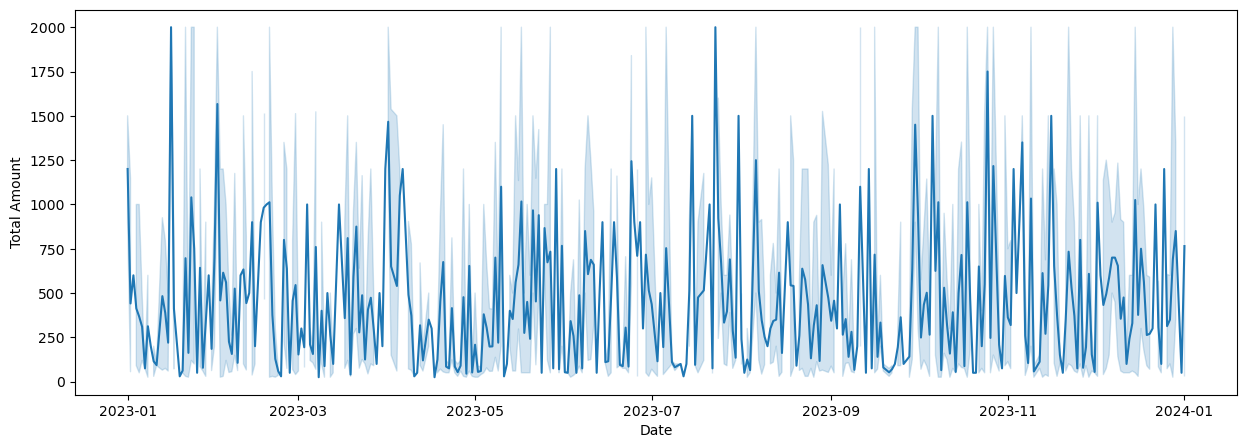

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Date",y="Total Amount",data=data)
plt.show()

In [28]:
data["Month"]=data["Date"].dt.month
data["Year"]= data["Date"].dt.year

In [30]:
Monthly_sales = data.groupby(["Year","Month"],as_index=False)["Total Amount"].sum()
data['Monthly_sales']= Monthly_sales['Total Amount']

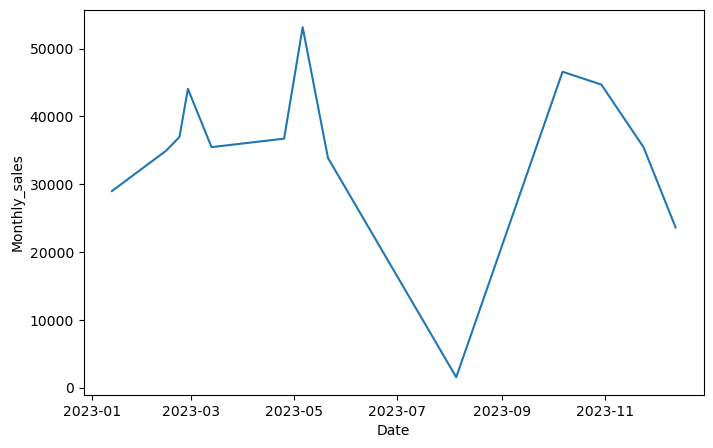

In [31]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Date",y="Monthly_sales",data=data)
plt.show()

In [32]:
data=data.drop(["Year","Month","Monthly_sales"],axis=1)
data.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25
162,163,2023-01-02,CUST163,Female,64,Clothing,3,50,150
420,421,2023-01-02,CUST421,Female,37,Clothing,3,500,1500
609,610,2023-01-03,CUST610,Female,26,Beauty,2,300,600
682,683,2023-01-04,CUST683,Male,38,Beauty,2,500,1000
230,231,2023-01-04,CUST231,Female,23,Clothing,3,50,150


#### CUSTOMER AND PRODUCT ANALYSIS

In [35]:
age_bins = [10,20,30,40,50,60]
age_labels = ['10-19','20-29','30-39','40-49','50+']
data["Age group"] = pd.cut(data["Age"],bins = age_bins, labels = age_labels , right = True)

In [36]:
Total_amount_by_age = data.groupby("Age group")['Total Amount'].sum()
print(Total_amount_by_age)

Age group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


In [37]:
Grouped_data = data.groupby(['Age group','Product Category'])['Total Amount'].sum().reset_index()

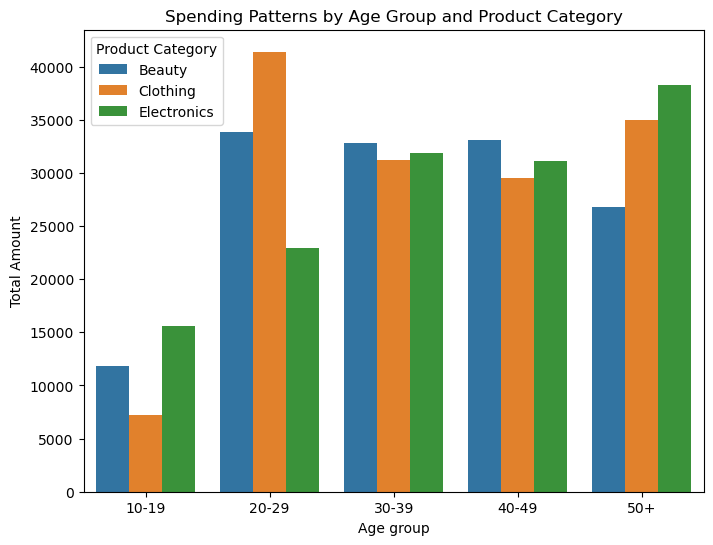

In [38]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Age group', y='Total Amount',hue = 'Product Category', data = Grouped_data )
plt.title('Spending Patterns by Age Group and Product Category')
plt.xlabel('Age group')
plt.ylabel('Total Amount')
plt.show()

In [39]:
Gender_Totalspend = data.groupby('Gender')['Total Amount'].sum().reset_index()
Gender_Totalspend

,Gender,Total Amount
0,Female,232840
1,Male,223160


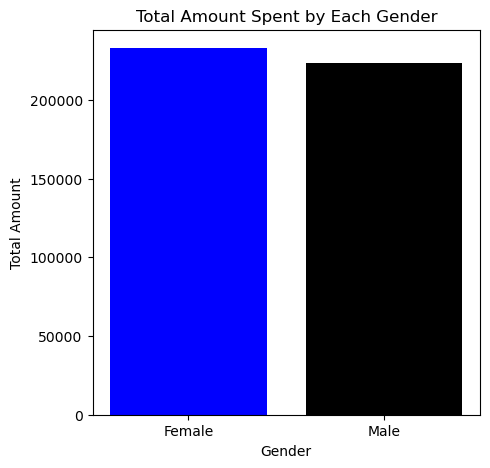

In [43]:
plt.figure(figsize = (5,5))
plt.bar(Gender_Totalspend['Gender'], Gender_Totalspend['Total Amount'],color = ['blue','black'])
plt.title('Total Amount Spent by Each Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [44]:
Gender_preference = data.groupby(['Gender','Product Category'])['Total Amount'].sum().reset_index()

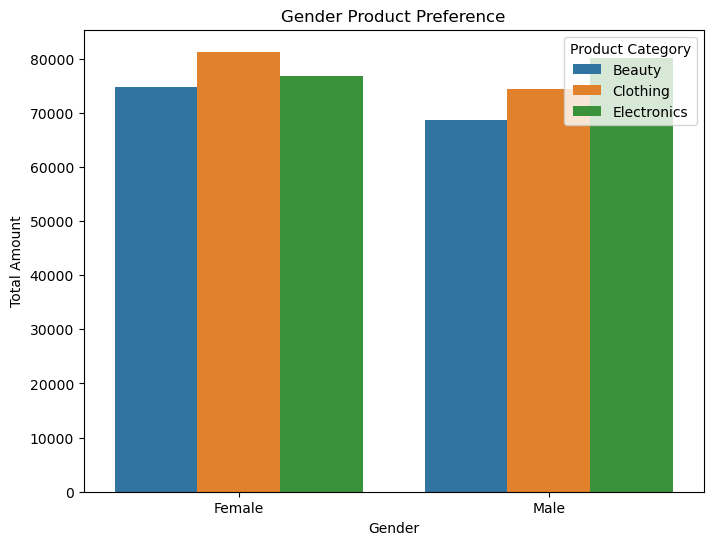

In [45]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Gender', y='Total Amount',hue = 'Product Category', data = Gender_preference )
plt.title('Gender Product Preference')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [47]:
Avg_amount_by_Gender = data.groupby('Gender')['Total Amount'].mean()
Avg_amount_by_Gender

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

In [48]:
Total_revenue = data.groupby('Product Category')['Total Amount'].sum().reset_index()
Total_revenue

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


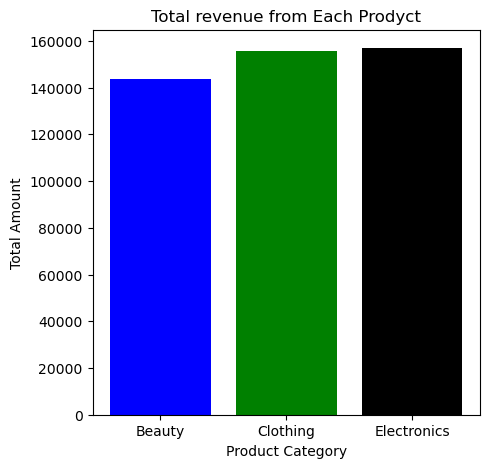

In [49]:
plt.figure(figsize = (5,5))
plt.bar(Total_revenue['Product Category'], Total_revenue['Total Amount'],color = ['blue','green','black'])
plt.title('Total revenue from Each Prodyct')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

In [50]:
Total_num = data.groupby('Product Category')['Quantity'].sum().reset_index()
Total_num 

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


##### RECOMMENDATION

###### 1. Optimize Inventory: Use sales trends to manage inventory levels efficiently, reducing stockouts and excess inventory costs.

##### 2. Targeted Marketing: Tailor marketing campaigns based on customer demographics and purchasing behavior to increase engagement and conversions.

##### 3. Improve Customer Experience: Enhance customer service and streamline the checkout process to improve satisfaction and retention.

##### 4. Diversify Product Offerings: Introduce new products based on demand analysis to meet evolving customer needs and increase sales opportunities.

##### 5. Implement Loyalty Programs: Reward loyal customers with incentives to increase retention and drive repeat purchases.

##### 6. Dynamic Pricing: Use pricing analysis to adjust prices dynamically, maximizing profitability while remaining competitive.

##### 7. Omnichannel Integration: Integrate online and offline channels to provide a seamless shopping experience and reach a wider audience.

##### 8. Data-Driven Decision Making: Utilize data analytics to inform strategic decisions and optimize business operations continuously.

##### 9. Monitor Market Trends: Stay informed about market trends and competitor strategies to adapt quickly and stay ahead of the competition.

##### 10. Continuous Improvement: Regularly review performance metrics and refine strategies to ensure ongoing growth and success.